## Tutorial

In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

Loading relevant libraries and the dataset

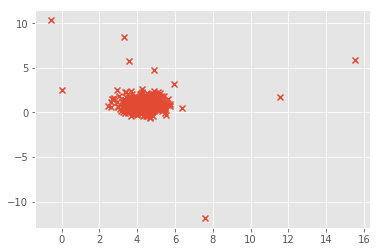

In [0]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=1,
                       cluster_std=0.60, random_state=0)
X_append, y_true_append = make_blobs(n_samples=10,centers=1,
                                    cluster_std=5,random_state=0)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:,0],X[:,1],marker="x")

In [0]:
X , y_true

(array([[ 4.98363526e+00,  8.97637672e-01],
        [ 4.68480619e+00,  1.07627418e+00],
        [ 4.48527047e+00,  1.01618041e+00],
        [ 4.53127837e+00,  9.66057830e-01],
        [ 4.51707640e+00, -8.48529919e-02],
        [ 3.36141328e+00,  1.36225876e+00],
        [ 5.47425256e+00, -4.74920358e-02],
        [ 4.87333521e+00,  1.17461613e+00],
        [ 5.12434567e+00,  9.22040874e-01],
        [ 4.43068554e+00,  1.73531678e+00],
        [ 4.90042396e+00,  2.01959369e+00],
        [ 4.36158014e+00,  1.07462722e+00],
        [ 4.60008939e+00,  1.00596707e+00],
        [ 4.09382131e+00,  3.58308909e-01],
        [ 4.70993215e+00,  1.23202532e+00],
        [ 4.17880807e+00,  1.32222457e+00],
        [ 4.38902441e+00,  1.19876508e+00],
        [ 4.17528733e+00,  2.08602483e+00],
        [ 4.33495456e+00,  4.31891060e-01],
        [ 4.49502392e+00,  1.52878537e+00],
        [ 4.41259038e+00,  7.12756365e-01],
        [ 4.35631807e+00,  1.54592256e+00],
        [ 4.06542424e+00,  5.938

Here we've manufactured a dataset where some points are visibly outliers from the main distribution.

We can see this from looking at the plot, but how do we robustly identify the outliers? 

That's where a Gaussian estimation comes in. For this dataset, we only need a single Gaussian, for which we are gonna calculate the mean and standard deviation. Then, we're able to find the points that don't seem likely to have originated from that distribution - these are our outliers!

First, we need to calculate the mean and variance for our data. Complete the function below to generate these values using these formulae:

$$\mu = \frac{1}{m} \sum_{i=1}^{m}X_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(X_i-\mu)^2$$

In [0]:
def estimateGaussian(X):
    """
     This function provides an estimate of mean and variance 
     of a Gaussian distribution along multiple dimensions
     using X, an N-dimensional vector
    """

    
    m = X.shape[0]
    
    #compute mean of X
    sum_ = np.sum(X, axis = 0)
    mu = sum_/ m
    
    # compute variance of X
    var = np.var(X, axis=0)
    
    
    
    return mu,var
mu, sigma2 = estimateGaussian(X)

print("Mean of X is : " , mu)
print("Variance of X is : " , sigma2)

Mean of X is :  [4.30770882 0.9756171 ]
Variance of X is :  [0.94147734 1.25990509]


Now, we will calculate for each point in X, the probability of the distribution $N(\mu,\sigma^2)$ generating that point randomly. This has been completed for you, although it is important to understand how the calculation of the PDF works.

In [0]:
def multivariateGaussian(X, mu, sigma2):
    """
    This function computes the probability density function of a multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p
p = multivariateGaussian(X, mu, sigma2)


Now that we have the probability of each point in the dataset, we can plot these on the original scatterplot:

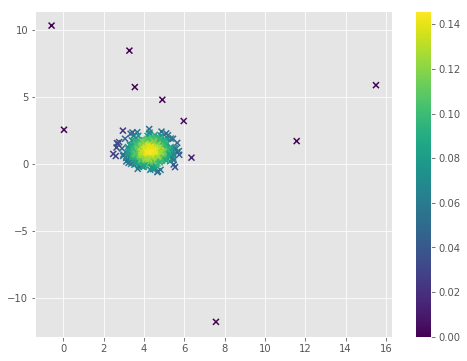

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

We're getting closer to the point where we can programatically identify our outliers for a single Gaussian distribution. The last step is to identify a value for $p$, below which we consider a point to be an outlier. We term this $\epsilon$.

In [0]:
#Choose a value for epsilon

epsilon = 0.02


Now we'll highlight on the scatter plot all points that are below $\epsilon$:

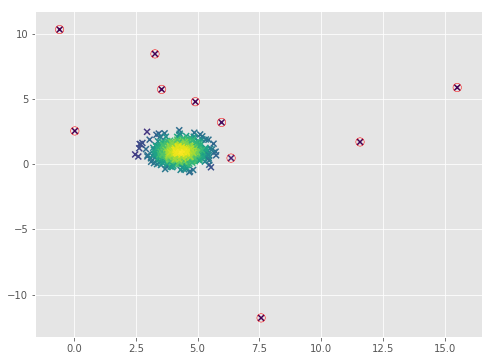

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

How well did your epsilon value do? Play around with different values until you're happy with the plot above. 

We can additionally look at our model's classification performance another way. By sorting the points ascending by their probability, and classifying the first $k$ points as anomalous, we can determine the model's precision@k. Implement this in the cell below. 

* What is the highest value of K for which we get precision of 1.0?----> __10__
* What is the precision for K=4?-----> _1___

In [0]:
from sklearn.metrics import precision_score
for i in range(0,15):
    mn = sorted(p)[i]
    sc = precision_score(y_true, 1*(p<=mn))
    print('K is', i+1, 'precision is', sc)




K is 1 precision is 1.0
K is 2 precision is 1.0
K is 3 precision is 1.0
K is 4 precision is 1.0
K is 5 precision is 1.0
K is 6 precision is 1.0
K is 7 precision is 1.0
K is 8 precision is 1.0
K is 9 precision is 1.0
K is 10 precision is 1.0
K is 11 precision is 0.9090909090909091
K is 12 precision is 0.8333333333333334
K is 13 precision is 0.7692307692307693
K is 14 precision is 0.7142857142857143
K is 15 precision is 0.6666666666666666


You may have noticed that in this example, we are training and testing on the _entire_ dataset. This is absolutely not standard practice! You should _always_ split into a training and testing set. However, the reason that we can get away with this here is because we don't actually use labels at all during training - this is an _unsupervised_ machine learning task. Unsupervised learning methods are beneficial for anomaly detection because in the real world (i.e. testing!) we might come across types of outliers that we didn't see during training. We want to use a method that can handle this, and unsupervised methods are often better suited to this type of domain.

For the next section, we'll move to Mixture of Gaussian models. Take a look at the following dataset:

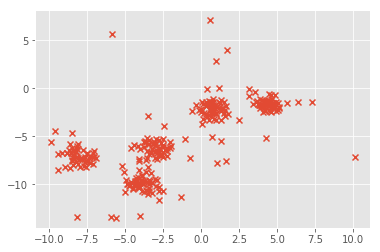

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5,
                                    cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

plt.scatter(X_train[:,0],X_train[:,1],marker="x");

Okay, we have more than one cluster centre now. So what? Let's just ignore that and use the same model as before. 

* What is the precision for k=1 in the cell below?-----> __1_
* k=10?-----> __0.9_
* k=100?-----> __0.13_

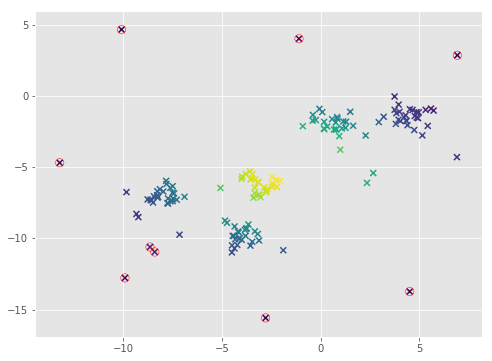

In [0]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);



In [0]:
from sklearn.metrics import precision_score
for i in range(100):
  mn = sorted(p)[i]
  sc = precision_score(y_test, 1*(p<=mn))
  print('K is', i+1, 'precision is', sc)

K is 1 precision is 1.0
K is 2 precision is 1.0
K is 3 precision is 1.0
K is 4 precision is 1.0
K is 5 precision is 1.0
K is 6 precision is 1.0
K is 7 precision is 1.0
K is 8 precision is 1.0
K is 9 precision is 1.0
K is 10 precision is 0.9
K is 11 precision is 0.8181818181818182
K is 12 precision is 0.75
K is 13 precision is 0.7692307692307693
K is 14 precision is 0.7857142857142857
K is 15 precision is 0.7333333333333333
K is 16 precision is 0.6875
K is 17 precision is 0.6470588235294118
K is 18 precision is 0.6111111111111112
K is 19 precision is 0.5789473684210527
K is 20 precision is 0.55
K is 21 precision is 0.5238095238095238
K is 22 precision is 0.5
K is 23 precision is 0.4782608695652174
K is 24 precision is 0.4583333333333333
K is 25 precision is 0.44
K is 26 precision is 0.4230769230769231
K is 27 precision is 0.4074074074074074
K is 28 precision is 0.39285714285714285
K is 29 precision is 0.3793103448275862
K is 30 precision is 0.36666666666666664
K is 31 precision is 0.354

Uh oh. This model performs terribly. It's fit the mean to a section of space where we don't have _any_ points, and it has absolutely no idea which points are outliers! This was probably pretty obvious to you though. We need to move to a Mixture of Gaussians model - one in which we use multiple Gaussians to fit the data. We'll use `sklearn.mixture.GaussianMixture` to do this - or rather you will! Use the documentation, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) to initialise and fit a `GaussianMixture` object called `gm` in the cell below.

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)
X_train

array([[  0.66688244,  -2.62077368],
       [ -2.79083126, -11.6735635 ],
       [ -3.63984948,  -5.65074228],
       [ -4.47402088, -10.52408142],
       [  0.96812885,  -2.60386043],
       [  0.79398525,  -1.99983202],
       [ -3.48770612,  -5.80365962],
       [ -3.8758876 ,  -9.1531885 ],
       [ -7.48372344,  -7.53159748],
       [  3.43702646,  -1.68277721],
       [  4.28603503,  -1.79295679],
       [ -4.75895402, -10.1936122 ],
       [ -5.00976168, -10.7968835 ],
       [ -4.12573327,  -9.19883824],
       [ -9.64369228,  -4.50023308],
       [ -3.39967279,  -6.84603303],
       [ -7.18521128,  -7.20214168],
       [ -8.2173045 ,  -7.66309406],
       [ -3.45859777,  -8.17919824],
       [  1.29330854,  -2.42230232],
       [ -4.36175543,  -9.70231057],
       [ -7.38611125,  -7.31186568],
       [ -5.93711618, -13.45601626],
       [  0.68857072,  -1.44458003],
       [  0.96633002,  -2.69409116],
       [ -0.35251184,  -1.69938032],
       [ -2.4839462 ,  -6.07246321],
 

Now we can use the method `gm.predict_proba()` to get the probability of each data point being in any of the five clusters:

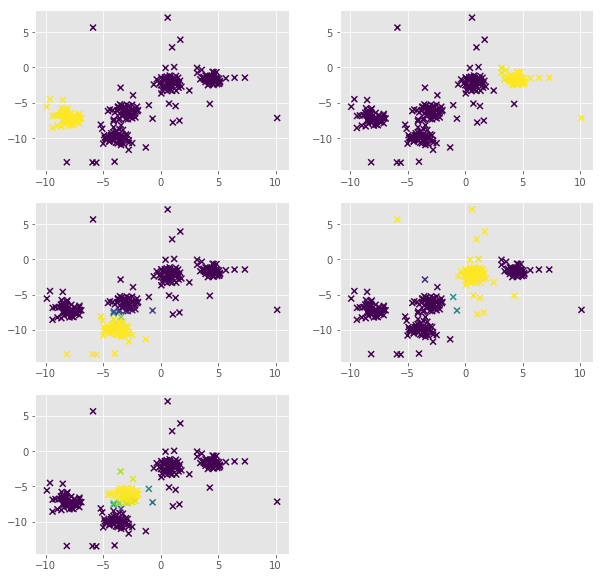

In [0]:
#plt.subplots(3,2,figsize=(8,6))
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.predict_proba(X_train)[:,i],cmap='viridis',marker='x')

Our Mixture of Gaussians model is powerful! Not only is it unsupervised, it can both classify points into one of the K clusters we have, _and_ it can help us with our ultimate goal of identifying outlier points! We can do this by finding the points that no cluster wants to claim for itself.

Use the following formula to calculate the probability of each point, and set it to `p`:

$$p(x) = 1 - \bigg( \prod_{i=1}^{k} 1 - p(x \in k) \bigg)$$

This formula returns the probability that the datapoint was produced at random by _any_ of the Gaussians we fit. Hence, we want to filter out anything without a very high probability of this.

In the cell below, calculate these values and then compute precision@k for k=1, 10, and 100.

* Is this model better or worse performing than the previous?-----> Better perfomance___
* Why might that be? ----->__In Gaussian Mixture model, we are considering n_components = 5, which creates 5 different normal distribution  corresponding to each cluster thus it will be more effective in identifying the outliers whereas single component model considers only one distribution which is not the best representation of 5 distinct clusters. Thus, it performs poorly compare to Gaussian Mixture Model.__

For a k of  1  the precision is  1.000  and the recall is  0.056
For a k of  10  the precision is  1.000  and the recall is  0.556
For a k of  20  the precision is  0.750  and the recall is  0.833
For a k of  50  the precision is  0.360  and the recall is  1.000
For a k of  100  the precision is  0.180  and the recall is  1.000


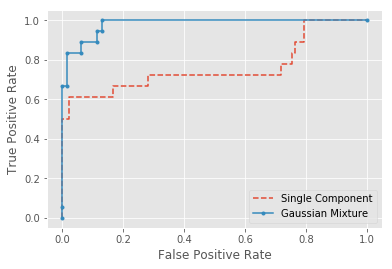

In [0]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm = gm.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample

for i in [1, 10,20, 50, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

#This part computes the ROC curves for both models like we talked about in class

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


Although our MoG model doesn't perfectly identify all the outliers, it performs way better than our previous model, again without any label information to help it along!

Let's look at a dataset that motivates using a Mixture of Gaussians model: Simpsons ratings.

Everyone knows that there's a certain point when The Simpsons "got bad", but can we use a Mixture of Gaussians to find out exactly when that was?

Load up the `simpsons.pickle` file using the cell below. It contains the IMDb rating for every simpsons episode.

In [0]:
!wget https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
with open('simpsons.pickle','rb') as f:
    simpsons = pickle.load(f)
    print(simpsons)



--2019-10-22 04:59:46--  https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle [following]
--2019-10-22 04:59:46--  https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26076 (25K) [application/octet-stream]
Saving to: ‘simpsons.pickle.2’

simpsons.pickle.2   100%[===================>]  25.46K  --.-KB/s    in 0.004s  

2019-10-22 04:59:46 (7.08 MB/s) - ‘simpsons.pickle.2’ saved [26076/26076]

{30: {"Bart's Not Dead":

With `plt.hist`, plot a histogram of the rating distribution for all Simpsons episodes. 

* What is the modal rating?-----> 7.1__
* What is the range of ratings? ----->_(4.0, 9.3)_

MIN, MAX:  (4.0, 9.3)
Modal Rating is:  7.1


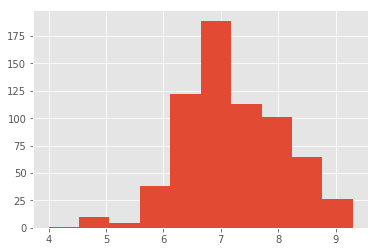

In [0]:
from statistics import mode
rating = []

for keys, values in simpsons.items():
  for rates in values:
    rating.append(values[rates])
print('MIN, MAX: ', (min(rating), max(rating)))
print('Modal Rating is: ', mode(rating))
plt.hist(rating, bins =10)
plt.style.use('ggplot')
plt.show()

  

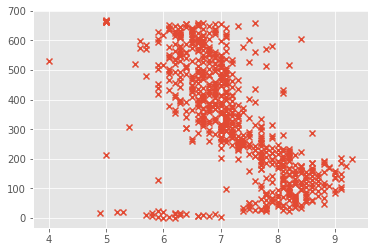

In [0]:
len(rating)

plt.scatter(rating,range(len(rating)),marker="x")



Next, use `sklearn.mixture.GaussianMixture` to fit a Mixture of Gaussians to the Simpsons rating distribution. Since we are trying to distinguish between good and bad ratings, we only need 2 gaussians.

* What are the means for the two Gaussians fit by the model?-----> _for bad rating Gaussian mean is 6.773 and for good rating Gaussian mean is 8.179_
* What about the standard deviations?-----> std for bad rating Gaussian is 0.596 and for good rating Gaussian is 0.474__

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 2 ,
                    covariance_type = 'full', random_state=0, )

X = np.asarray(rating)
X  = X.reshape(-1,1)
gm.fit(X)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
# means and standard deviation of two Gaussians cluster

print("Mean for the bad rating gaussian is: " , gm.means_[0][0], 'and mean for good rating gaussian is: ', gm.means_[1][0])

print("Standard deviation for the bad rating gaussian is : ", np.sqrt(gm.covariances_)[0][0][0], "and standard deviation for the good rating gaussian is: ", np.sqrt(gm.covariances_)[1][0][0])

Mean for the bad rating gaussian is:  6.773421102011729 and mean for good rating gaussian is:  8.179428886058874
Standard deviation for the bad rating gaussian is :  0.5968930283014954 and standard deviation for the good rating gaussian is:  0.47412260237406


Finally, using the `GaussianMixture.predict()` method, we can use maximum likelihood to estimate which distribution, good or bad, each episode belongs to. In the cell below, count the number of episodes predicted to be in the "good" distribution per season, and plot using `plt.plot`.

* Where is the notable drop-off point? ----->_At season number 8_
* When is the first season with 0 good episodes? ----->_15th season_

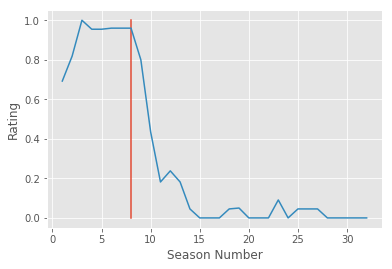

In [0]:
#finding drop-off point
Xs = []
Ys = []
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
for season, episodes in simpsons.items():
     bad = 0
     good = 0
     for episode in episodes.values():
          if gm.predict(np.array(
               episode
          ).reshape(-1,1)) == 0:
               good += 1
          else:
               bad += 1
     Xs.append(season)
     Ys.append(bad/(good+bad))

plt.plot([8,8], [0.0,1])
plt.xlabel('Season Number')
plt.ylabel('Rating')

plt.plot(Xs,Ys)

## Exercises

Now we are going to work with a credit card fraud dataset (more detail can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)). This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load up the dataset using Pandas' `read_csv` function. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?[1]-----> __284807___
* What features in the dataset are present aside from the 28 main features?[1] -----> _Time, Amount___
* Why do you think the main features are given to us in this way?[1]-----> _- May be result of PCA (PRINCIPAL COMPONENT ANALYSIS) dimentionality reduction to protect user identities and sensitive features ____
* Which column contains the targets? Can you figure out what the values correspond to?[1]-----> _Class Column : 1 for fraudulent transaction and 0 for genuine transacton____

In [0]:
pip install wget

In [0]:
import wget
wget.download('https://github.com/alexwolson/APS1070_data/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [0]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("creditcard.csv")
data.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
print("No of rows are : " , len(data))

No of rows are :  284807


It's always important when looking at a new dataset to figure out how many rows we have for each class.

* What is the percentage of entries in the dataset for each class?[1]-----> _0 class is 99.827% and class 1 is of 0.1727%____
* Why might this pose a problem with methods we have looked at so far?[1]-----> _This is a typical case of Class imbalance in input data. Here, we observe that the data is highly skewed towards Class 0. If we are to use this data as is, it will provide very few data points to the model to generalise about Class 1. Hence it will perform poorly on completely unknown dataset with balanced classes. In addition to this, when we assess the model based on its accuracy it will always show high number eventhough it classifies everything as class 0. ____



In [0]:
data['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Next, split the dataset into a training and testing set using sklearn's `train_test_split` function. Use a test size of one third, and set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in these exercises we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V24? Make sure to only use your training set for this.[1]-----> _Mean = 0.000294 and std = 0.604862____

Use the code below to set up a Gaussian object for V24.

In [0]:
# Training and splitting the data
independent_data = data.drop('Class', axis = 1)
#dropping target data for training and testing purpose
X = independent_data
y = data['Class']

#splitting data in training and testing
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size= 0.33, random_state = 0)



In [0]:
from scipy import stats
import numpy as np


norm = stats.norm(
    
)

print("Mean for V24: " , np.mean(X_train['V24'],axis=0))

print("Standard deviation for V24: ", np.std(X_train['V24'], axis = 0))



norm = stats.norm(loc =np.mean(X_train['V24'], axis =0),scale = np.std(X_train['V24'],axis = 0))


Mean for V24:  0.0002942484069872571
Standard deviation for V24:  0.604862602121588


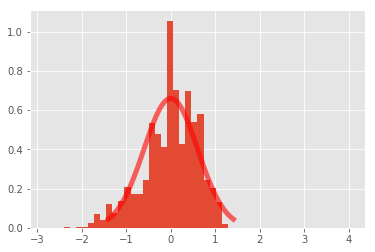

In [0]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train['V24'].values, density=True, histtype='stepfilled', bins=50);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

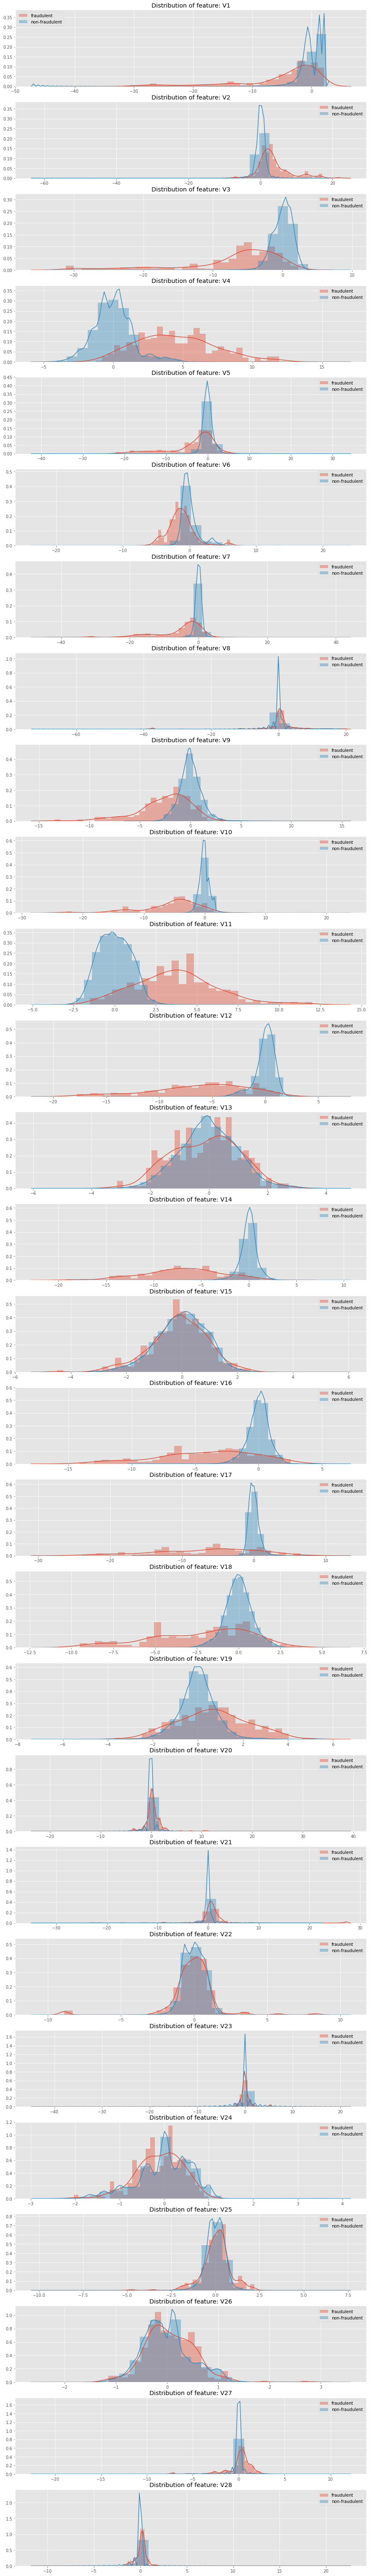

In [0]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in data.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Build an outlier detection model using a Mixture of Gaussians using a subset of features of your choice (pick a few) and a number of mixture components. Report the precision@k for k=1, 10 and 100 (on test data). Repeat this model creation process at least 4 more times, each time selecting different parameters (features selected, number of mixture components), and reporting the precision as above. Organize your findings in a table or plot and describe your findings. What can you conclude about what models work best? [3]

In [0]:
from sklearn.mixture import GaussianMixture
gm1 = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )

# Model: (1) for first 5 features viz a viz V1,V2,V3,V4,V5

data1 = data[['V1','V2','V3','V4','V5','Class']]

# Training and splitting the data
independent_data1 = data1.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X1 = independent_data1
y1 = data1['Class']

#splitting data in training and testing
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X1,y1 , test_size= 0.33, random_state = 0)

gm1.fit(X_train1)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm1 = gm1.score_samples(X_test1) #score_samples will compute the weighted log probabilities for each sample

df_list1 = []
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm1 = sorted(p_gm1)[i] #We sort the points by probability, as before
   precision1 = precision_score(y_test1, p_gm1 < mn_gm1) #Here, we compare y_test labels to our picks using precision
   recall1 = recall_score(y_test1, p_gm1 < mn_gm1) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision1,' and the recall is ', '%.3f' % recall1) #We print precision and recall three times

   dict1 = {'k' : i, 'Precision' : precision1, 'Recall' : recall1, 'Model':'Model1'}
   df_list1.append(dict1)

df_model1 = pd.DataFrame(df_list1)
df_model1

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.600  and the recall is  0.037
For a k of  100  the precision is  0.340  and the recall is  0.210


,Model,Precision,Recall,k
0,Model1,0.00,0.000000,1
1,Model1,0.60,0.037037,10
2,Model1,0.34,0.209877,100


In [0]:
# Model : (2) for another 5 feature data viz a viz V11,V13,V15,V17,V19 

gm2 = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )


data2 = data[['V11','V13','V15','V17','V19','Class']]

# Training and splitting the data
independent_data2 = data2.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X2 = independent_data2
y2 = data2['Class']

#splitting data in training and testing
X_train2, X_test2 , y_train2, y_test2 = train_test_split(X2,y2 , test_size= 0.33, random_state = 0)

gm2.fit(X_train2)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm2 = gm2.score_samples(X_test2) #score_samples will compute the weighted log probabilities for each sample

df_list2 = []
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm2 = sorted(p_gm2)[i] #We sort the points by probability, as before
   precision2 = precision_score(y_test2, p_gm2 < mn_gm2) #Here, we compare y_test labels to our picks using precision
   recall2 = recall_score(y_test2, p_gm2 < mn_gm2) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision2,' and the recall is ', '%.3f' % recall2) #We print precision and recall three times
   dict2 = {'k' : i, 'Precision' : precision2, 'Recall' : recall2, 'Model':'Model2'}
   df_list2.append(dict2)

df_model2 = pd.DataFrame(df_list2)
df_model2

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.056
For a k of  100  the precision is  0.620  and the recall is  0.383


,Model,Precision,Recall,k
0,Model2,0.00,0.000000,1
1,Model2,0.90,0.055556,10
2,Model2,0.62,0.382716,100


In [0]:
# Model : (3) for another 5 feature data viz a viz V12,V14,V16,V18,V20

gm3 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )


data3 = data[['V12','V14','V16','V18','V20','Class']]

# Training and splitting the data
independent_data3 = data3.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X3 = independent_data3
y3 = data3['Class']

#splitting data in training and testing
X_train3, X_test3 , y_train3, y_test3= train_test_split(X3,y3 , test_size= 0.33, random_state = 0)

gm3.fit(X_train3)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm3 = gm3.score_samples(X_test3) #score_samples will compute the weighted log probabilities for each sample

df_list3 = []
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm3 = sorted(p_gm3)[i] #We sort the points by probability, as before
   precision3 = precision_score(y_test3, p_gm3 < mn_gm3) #Here, we compare y_test labels to our picks using precision
   recall3 = recall_score(y_test3, p_gm3 < mn_gm3) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision3,' and the recall is ', '%.3f' % recall3) #We print precision and recall three times
   dic = {'k':i , 'Precision': precision3, 'Recall': recall3, 'Model': 'Model3'}
   df_list3.append(dic)

df_model3 = pd.DataFrame(df_list3)
df_model3

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.600  and the recall is  0.037
For a k of  100  the precision is  0.550  and the recall is  0.340


,Model,Precision,Recall,k
0,Model3,0.00,0.000000,1
1,Model3,0.60,0.037037,10
2,Model3,0.55,0.339506,100


In [0]:
# Model : (4) for another 5 feature data viz a viz V6,V7,V8,V9,V10

gm4 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )


data4 = data[['V6','V7','V8','V9','V10','Class']]

# Training and splitting the data
independent_data4 = data4.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X4 = independent_data4
y4 = data4['Class']

#splitting data in training and testing
X_train4, X_test4 , y_train4, y_test4= train_test_split(X4,y4 , test_size= 0.33, random_state = 0)

gm4.fit(X_train4)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm4 = gm4.score_samples(X_test4) #score_samples will compute the weighted log probabilities for each sample

df_list4=[]
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm4 = sorted(p_gm4)[i] #We sort the points by probability, as before
   precision4 = precision_score(y_test4, p_gm4 < mn_gm4) #Here, we compare y_test labels to our picks using precision
   recall4 = recall_score(y_test4, p_gm4 < mn_gm4) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision4,' and the recall is ', '%.3f' % recall4) #We print precision and recall three times

   dict4 = {'k' : i, 'Precision' : precision4, 'Recall' : recall4, 'Model':'Model4'}
   df_list4.append(dict4)

df_model4 = pd.DataFrame(df_list4)
df_model4

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.200  and the recall is  0.012
For a k of  100  the precision is  0.290  and the recall is  0.179


,Model,Precision,Recall,k
0,Model4,0.00,0.000000,1
1,Model4,0.20,0.012346,10
2,Model4,0.29,0.179012,100


In [0]:
# Model : (4a) for the same 5 feature data we used in Model : 4 viz a viz V6,V7,V8,V9,V10 but with different number of components
gm4a = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )


data4a = data[['V6','V7','V8','V9','V10','Class']]

# Training and splitting the data
independent_data4a = data4a.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X4a = independent_data4a
y4a = data4a['Class']

#splitting data in training and testing
X_train4a, X_test4a , y_train4a, y_test4a= train_test_split(X4a,y4a , test_size= 0.33, random_state = 0)

gm4a.fit(X_train4a)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm4a = gm4a.score_samples(X_test4a) #score_samples will compute the weighted log probabilities for each sample

df_list4a=[]
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm4a = sorted(p_gm4a)[i] #We sort the points by probability, as before
   precision4a = precision_score(y_test4a, p_gm4a < mn_gm4a) #Here, we compare y_test labels to our picks using precision
   recall4a = recall_score(y_test4a, p_gm4a < mn_gm4a) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision4a,' and the recall is ', '%.3f' % recall4a) #We print precision and recall three times

   dict4a = {'k' : i, 'Precision' : precision4a, 'Recall' : recall4a, 'Model':'Model4a'}
   df_list4a.append(dict4a)

df_model4a = pd.DataFrame(df_list4a)
df_model4a

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.270  and the recall is  0.167


,Model,Precision,Recall,k
0,Model4a,0.00,0.000000,1
1,Model4a,0.00,0.000000,10
2,Model4a,0.27,0.166667,100


In [0]:
# Model : (5) for another 5 feature data viz a viz V21,V22,V23,V24,V25

gm5 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )


data5 = data[['V21','V22','V23','V24','V25','Class']]
# Training and splitting the data
independent_data5 = data5.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X5 = independent_data5
y5 = data5['Class']

#splitting data in training and testing
X_train5, X_test5 , y_train5, y_test5= train_test_split(X5,y5 , test_size= 0.33, random_state = 0)

gm5.fit(X_train5)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm5 = gm5.score_samples(X_test5) #score_samples will compute the weighted log probabilities for each sample

df_list5 = []
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm5 = sorted(p_gm5)[i] #We sort the points by probability, as before
   precision5 = precision_score(y_test5, p_gm5 < mn_gm5) #Here, we compare y_test labels to our picks using precision
   recall5 = recall_score(y_test5, p_gm5 < mn_gm5) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision5,' and the recall is ', '%.3f' % recall5) #We print precision and recall three times

   dict5 = {'k' : i, 'Precision' : precision5, 'Recall' : recall5, 'Model':'Model5'}
   df_list5.append(dict5)

df_model5 = pd.DataFrame(df_list5)
df_model5

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.000  and the recall is  0.000


,Model,Precision,Recall,k
0,Model5,0.0,0.0,1
1,Model5,0.0,0.0,10
2,Model5,0.0,0.0,100


In [0]:
# Model : (6) for another 3 feature data viz a viz V26,V27,V28

gm6 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )


data6 = data[['V26','V27','V28','Class']]
# Training and splitting the data
independent_data6 = data6.drop('Class', axis = 1)

#dropping target data for training and testing purpose
X6 = independent_data6
y6 = data6['Class']

#splitting data in training and testing
X_train6, X_test6 , y_train6, y_test6= train_test_split(X6,y6 , test_size= 0.33, random_state = 0)

gm6.fit(X_train6)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm6 = gm6.score_samples(X_test6) #score_samples will compute the weighted log probabilities for each sample

df_list6 = []
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm6 = sorted(p_gm6)[i] #We sort the points by probability, as before
   precision6 = precision_score(y_test6, p_gm6 < mn_gm6) #Here, we compare y_test labels to our picks using precision
   recall6 = recall_score(y_test6, p_gm6 < mn_gm6) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision6,' and the recall is ', '%.3f' % recall6) #We print precision and recall three times

   dict6 = {'k' : i, 'Precision' : precision6, 'Recall' : recall6, 'Model':'Model6'}
   df_list6.append(dict6)

df_model6 = pd.DataFrame(df_list6)
df_model6

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.000  and the recall is  0.000


,Model,Precision,Recall,k
0,Model6,0.0,0.0,1
1,Model6,0.0,0.0,10
2,Model6,0.0,0.0,100


In [0]:
# merging all models' results in one table

df = pd.concat([df_model1,df_model2,df_model3,df_model4,df_model4a, df_model5,df_model6])
df


,Model,Precision,Recall,k
0,Model1,0.00,0.000000,1
1,Model1,0.60,0.037037,10
2,Model1,0.34,0.209877,100
0,Model2,0.00,0.000000,1
1,Model2,0.90,0.055556,10
2,Model2,0.62,0.382716,100
0,Model3,0.00,0.000000,1
1,Model3,0.60,0.037037,10
2,Model3,0.55,0.339506,100
0,Model4,0.00,0.000000,1


In [0]:
#Conclusion

''' From the above different models precision @k tests,
we can observe that model 2's performace is best compare to other models as its for k of 10 precision is the highest among the other models' precision at 10.
It is 0.9 and recall is also greater than other models' for k at 10.
this means that the feature that we have taken in model 2 (V11,V13,V15,V17,V19) performs better and gives us best relevant
results compare to other features.

Whereas in model 5 and model 6 precision and recall, for all taken K values, are zero. These results indicate that, the features taken in the model 5 and 
model 6 are not providing a relevant inforamation about the input data. 

As we can see from model 4 and model 4a, There is significant difference in precision and recall for the same feature of data. 
I have changed the number of components in model 4a compare to model 4.
So we can say that as we increase the number of components the precison and the recall drops. We get the optimum results with two cluster (n_components = 2).
Our model performs best at 2 components. However with increase in n_components our model is perfoming poor. 
'''  


" From the above different models precision @k tests,\nwe can observe that model 2's performace is best compare to other models as its for k of 10 precision is the highest among the other models' precision at 10.\nIt is 0.9 and recall is also greater than other models' for k at 10.\nthis means that the feature that we have taken in model 2 (V11,V13,V15,V17,V19) performs better and gives us best relevant\nresults compare to other features.\n\nWhereas in model 5 and model 6 precision and recall, for all taken K values, are zero. These results indicate that, the features taken in the model 5 and \nmodel 6 are not providing a relevant inforamation about the input data. \n\nAs we can see from model 4 and model 4a, There is significant difference in precision and recall for the same feature of data. \nI have changed the number of components in model 4a compare to model 4.\nSo we can say that as we increase the number of components the precison and the recall drops. This is because our target